Transfer Learning VGG 16 and VGG 19 using keras

In [1]:
# Import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
test_path = 'Datasets/Test'

In [4]:
# Import the vgg16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagnet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want 
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation = 'softmax')(x)
# create a model object
model = Model(inputs = resnet.input, outputs = prediction)
model

In [9]:
# view the structure of the model 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [10]:
# tell the model what cost and optimization method to use
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2, 
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialized for the image size

training_set = train_datagen.flow_from_directory('Datasets/Train/',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/Test/',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model 
# Run the cell. It will take some time to execute 
r = model.fit_generator(
                        training_set,
                        validation_data = test_set,
                        epochs = 50,
                        steps_per_epoch = len(training_set),
                        validation_steps = len(test_set)
)

C:\Users\qu299cr\AppData\Local\Temp\ipykernel_22224\2752823116.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 25s 11s/step - loss: 7.1497 - accuracy: 0.3438 - val_loss: 8.0289 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 13s 9s/step - loss: 3.5426 - accuracy: 0.4531 - val_loss: 7.5454 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 12s 8s/step - loss: 6.2454 - accuracy: 0.3125 - val_loss: 4.6219 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 11s 8s/step - loss: 4.0635 - accuracy: 0.3125 - val_loss: 1.5325 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 12s 8s/step - loss: 1.8372 - accuracy: 0.4219 - val_loss: 3.7268 - val_accuracy: 0.3793
Epoch 6/50
2/2 [==============================] - 12s 8s/step - loss: 2.5392 - accuracy: 0.5000 - val_loss: 2.9501 - val_accuracy: 0.1897
Epoch 7/50
2/2 [==============================] - 12s 8s/step - loss: 1.2712 - accuracy: 0.6094 - val_loss: 1.4652 - val_accuracy: 0.5862
Epoch 8/50
2/2 [=================

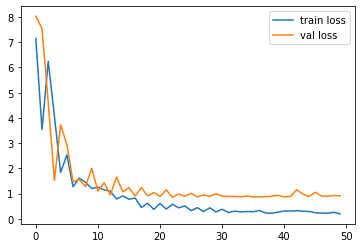

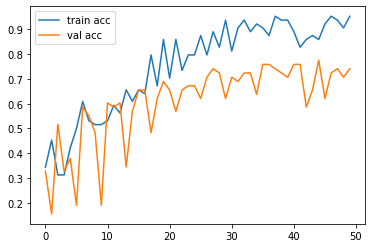

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_Loss')

# plot the accuracy 
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# Save it as a h5 file

from tensorflow.keras.models import load_model 
model.save('model_resent50.h5')

In [18]:
y_pred = model.predict(test_set)

2/2 [==============================] - 8s 2s/step


In [19]:
y_pred

array([[4.44235094e-02, 9.31583107e-01, 2.39932705e-02],
       [7.95474350e-02, 8.16895008e-01, 1.03557639e-01],
       [4.46354449e-02, 7.80732691e-01, 1.74631923e-01],
       [8.31908703e-01, 1.44402564e-01, 2.36887094e-02],
       [3.83937389e-01, 5.34056544e-01, 8.20059553e-02],
       [1.60790328e-02, 9.71046448e-01, 1.28745968e-02],
       [7.56644130e-01, 1.70680344e-01, 7.26754740e-02],
       [1.41969725e-01, 2.92027384e-01, 5.66002846e-01],
       [3.89967769e-01, 5.91226459e-01, 1.88058130e-02],
       [1.62489638e-02, 9.83087301e-01, 6.63834217e-04],
       [3.96973826e-03, 9.90563869e-01, 5.46632195e-03],
       [1.08552529e-02, 9.58990157e-01, 3.01545393e-02],
       [1.13844667e-02, 6.55738056e-01, 3.32877427e-01],
       [9.32815596e-02, 8.96402299e-01, 1.03160609e-02],
       [9.55726802e-01, 3.18175480e-02, 1.24556571e-02],
       [8.83343369e-02, 4.48804498e-01, 4.62861121e-01],
       [2.82937765e-01, 3.95148210e-02, 6.77547455e-01],
       [8.79089013e-02, 1.22580

In [20]:
import numpy as np 
y_pred = np.argmax(y_pred, axis = 1)

In [21]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing import image

model = load_model('model_resent50.h5')

In [24]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

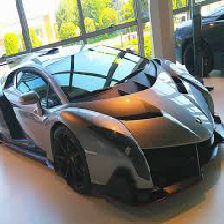

In [25]:
img

In [27]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[0.11738882, 0.04993735, 0.83267385]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 192ms/step


In [33]:
a

array([2], dtype=int64)

In [34]:
a==1

array([False])